In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pprint

with rasterio.open('./ghw2018_snowmelt_data/TB20140323_SUPERsnow_depth.tif_mean30m.tif') as raster:
    pprint.pprint(raster.profile)
    print(raster.indexes)
    snowdepth_data = raster.read(1)
    
plt.figure(figsize=(15,15))
plt.imshow(snowdepth_data)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

ModuleNotFoundError: No module named 'rasterio'

{'blockxsize': 192,
 'blockysize': 176,
 'compress': 'packbits',
 'count': 1,
 'crs': CRS({'init': 'epsg:32611'}),
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 1684,
 'interleave': 'band',
 'nodata': None,
 'tiled': True,
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
       0.0, -29.999999999999723, 4229820.934460746),
 'width': 1777}
(1,)


Text(0,0.5,'Row #')

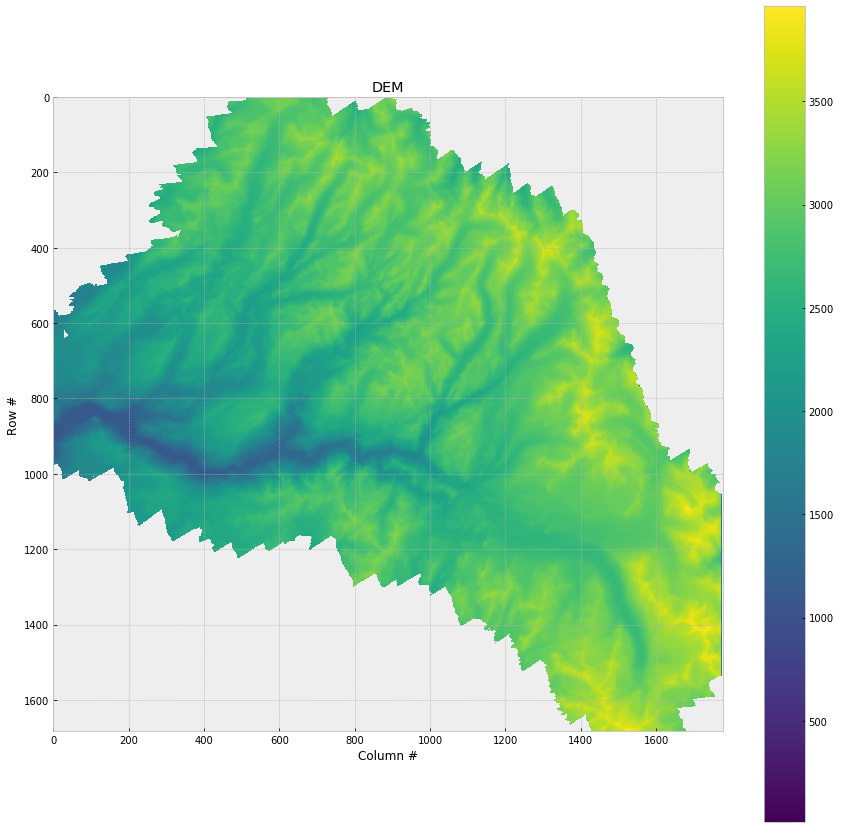

In [10]:
with rasterio.open('./ghw2018_snowmelt_data/dem30m.tif') as raster:
    pprint.pprint(raster.profile)
    print(raster.indexes)
    dem_data = raster.read(1)
    
plt.figure(figsize=(15,15))
plt.imshow(dem_data)
plt.colorbar()
plt.title("DEM")
plt.xlabel('Column #')
plt.ylabel('Row #')

{'blockxsize': 192,
 'blockysize': 176,
 'compress': 'packbits',
 'count': 1,
 'crs': CRS({'init': 'epsg:32611'}),
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 1684,
 'interleave': 'band',
 'nodata': None,
 'tiled': True,
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
       0.0, -29.999999999999723, 4229820.934460746),
 'width': 1777}
(1,)


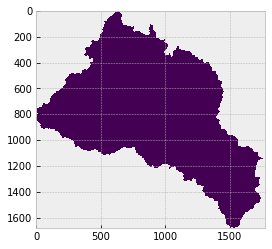

In [14]:
with rasterio.open('./ghw2018_snowmelt_data/scene_30m_mask.tif') as raster:
    pprint.pprint(raster.profile)
    print(raster.indexes)
    mask = raster.read(1)
    
plt.imshow(mask)

In [15]:
dem_mask = dem_data * mask
plt.imshow(dem_mask)

In [36]:
with rasterio.open('./ghw2018_snowmelt_data/veg_bin30res.tif') as raster:
    pprint.pprint(raster.profile)
    print(raster.indexes)
    veg_orig = raster.read(1)

{'blockxsize': 192,
 'blockysize': 176,
 'compress': 'packbits',
 'count': 1,
 'crs': CRS({'init': 'epsg:32611'}),
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 1684,
 'interleave': 'band',
 'nodata': None,
 'tiled': True,
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
       0.0, -29.999999999999723, 4229820.934460746),
 'width': 1777}
(1,)


In [23]:
with rasterio.open('./ghw2018_snowmelt_data/veg_bin30res.tif') as raster:
    pprint.pprint(raster.profile)
    print(raster.indexes)
    veg = raster.read(1)

{'blockxsize': 192,
 'blockysize': 176,
 'compress': 'packbits',
 'count': 1,
 'crs': CRS({'init': 'epsg:32611'}),
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 1684,
 'interleave': 'band',
 'nodata': None,
 'tiled': True,
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
       0.0, -29.999999999999723, 4229820.934460746),
 'width': 1777}
(1,)


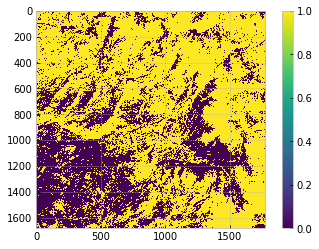

In [25]:
plt.imshow(veg)
plt.colorbar()

In [32]:
veg[veg == 0] = 2
veg[veg == 1] = 0
veg[veg == 2] = 1

In [35]:
with rasterio.open("newfile.tif", 'w', driver='GTiff', height=veg.shape[0],
                       width=veg.shape[1], count=1, dtype=veg.dtype,
                       crs=veg.crs, transform=veg.transform) as dst:
    dst.write(veg, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'crs'

In [ ]:
#dividing DEM into elevation bands